In [1]:
# Install and import tensorflow
!pip install tensorflow
import tensorflow as tf
print(tf.__version__)

2.15.0


In [2]:
# Import basid libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("/content/Churn_Modelling.csv")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# Separate the dataset into Independent and dependent data
X = df.iloc[:,3:13]
Y = df.iloc[:,-1]

In [6]:
X.head()  # Below features are enough to be our independent data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
Y.head() # Exited feature will be our dependent variable

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [8]:
# Since we have categorical data we are doing a bit of feature engineering by encoding it to binary values
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [9]:
X=X.drop(["Geography","Gender"],axis=1)  #dropped the previous categorical variable feature and will concat the encoded features in further steps

In [10]:
X=pd.concat([X,geography,gender],axis=1) # Added our enoded features

In [11]:
#Splitting our data for training and testing
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [12]:
#Feature scaling below

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [13]:
x_train.shape
x_test.shape

(2000, 11)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, PReLU, ELU, ReLU, Dropout

In [15]:
# Initializing the ANN
classifier=Sequential()


In [16]:
# Adding the input layer :

classifier.add(Dense(units=11,activation='relu'))

In [17]:
# Adding the first hidden layer :

classifier.add(Dense(units=7,activation='relu'))

In [19]:
#Adding the second hidden layer :
classifier.add(Dense(units=6,activation='relu'))

In [20]:
# Adding the output layer

classifier.add(Dense(units=1,activation='sigmoid'))

In [26]:
opt=tf.keras.optimizers.Adam(learning_rate=0.01)
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [30]:
# early stopping if the model accuracy is not increasing and constant
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)


In [31]:
model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3228 - accuracy: 0.8612 - val_loss: 0.3686 - val_accuracy: 0.8493
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3194 - accuracy: 0.8677 - val_loss: 0.3948 - val_accuracy: 0.8497
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3223 - accuracy: 0.8630 - val_loss: 0.3907 - val_accuracy: 0.8398
Epoch 4/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3236 - accuracy: 0.8630 - val_loss: 0.4072 - val_accuracy: 0.8402
Epoch 5/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3243 - accuracy: 0.8675 - val_loss: 0.3828 - val_accuracy: 0.8485
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3198 - accuracy: 0.8688 - val_loss: 0.3855 - val_accuracy: 0.8448
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3204 - accuracy: 0.8655 - val_loss: 0.3777 - val_accuracy:

In [32]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

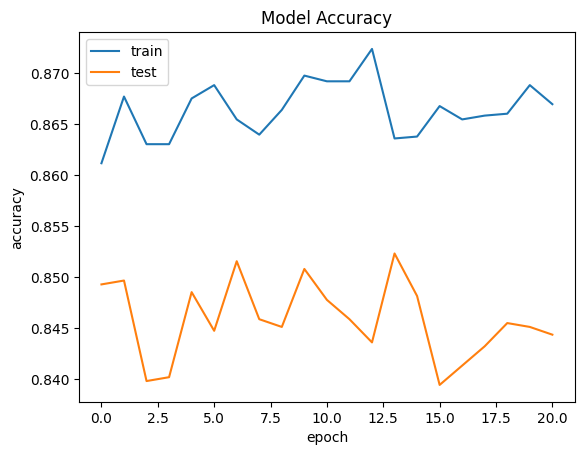

In [34]:
import matplotlib.pyplot as plt
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [35]:
y_pred=classifier.predict(x_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 3ms/step


In [37]:
# Make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1499,   96],
       [ 196,  209]])

In [41]:
# calulate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score      # 85% accuracy


0.854

In [42]:
# To get the weights :
weights=classifier.get_weights()
weights

[array([[-0.9393901 , -1.2347248 , -0.6995103 ,  0.6867323 , -0.45557764,
          0.13324398, -0.15534773, -0.33701608,  1.854287  , -0.5055335 ,
          0.21976595],
        [-2.1031983 ,  0.32296574,  1.835094  , -3.4100568 ,  1.5154942 ,
         -1.1938822 ,  3.1753316 , -3.861991  ,  0.05198722,  2.9134393 ,
          1.025712  ],
        [ 0.20098652, -1.3479686 , -0.67430466,  0.2697991 , -0.17313944,
         -0.23572852, -0.690875  , -0.4487956 , -0.00653366,  0.19341882,
          1.6146902 ],
        [-3.017335  , -0.7729786 , -3.9532163 ,  0.6057832 ,  0.5589809 ,
         -3.0220032 , -0.35738412, -0.30125841, -2.0997753 , -0.7260226 ,
         -1.5626806 ],
        [-1.1138251 , -0.75949264, -3.709591  , -2.2622104 ,  4.302236  ,
          3.4626343 , -0.33873862,  0.81527734,  1.8761777 ,  1.0889854 ,
          0.16766456],
        [-0.94199395, -0.64877045,  0.19483593,  2.7545629 , -0.644316  ,
          0.55210465, -0.09161664, -0.7500177 , -1.2016113 , -0.8999143